In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import seaborn as sns

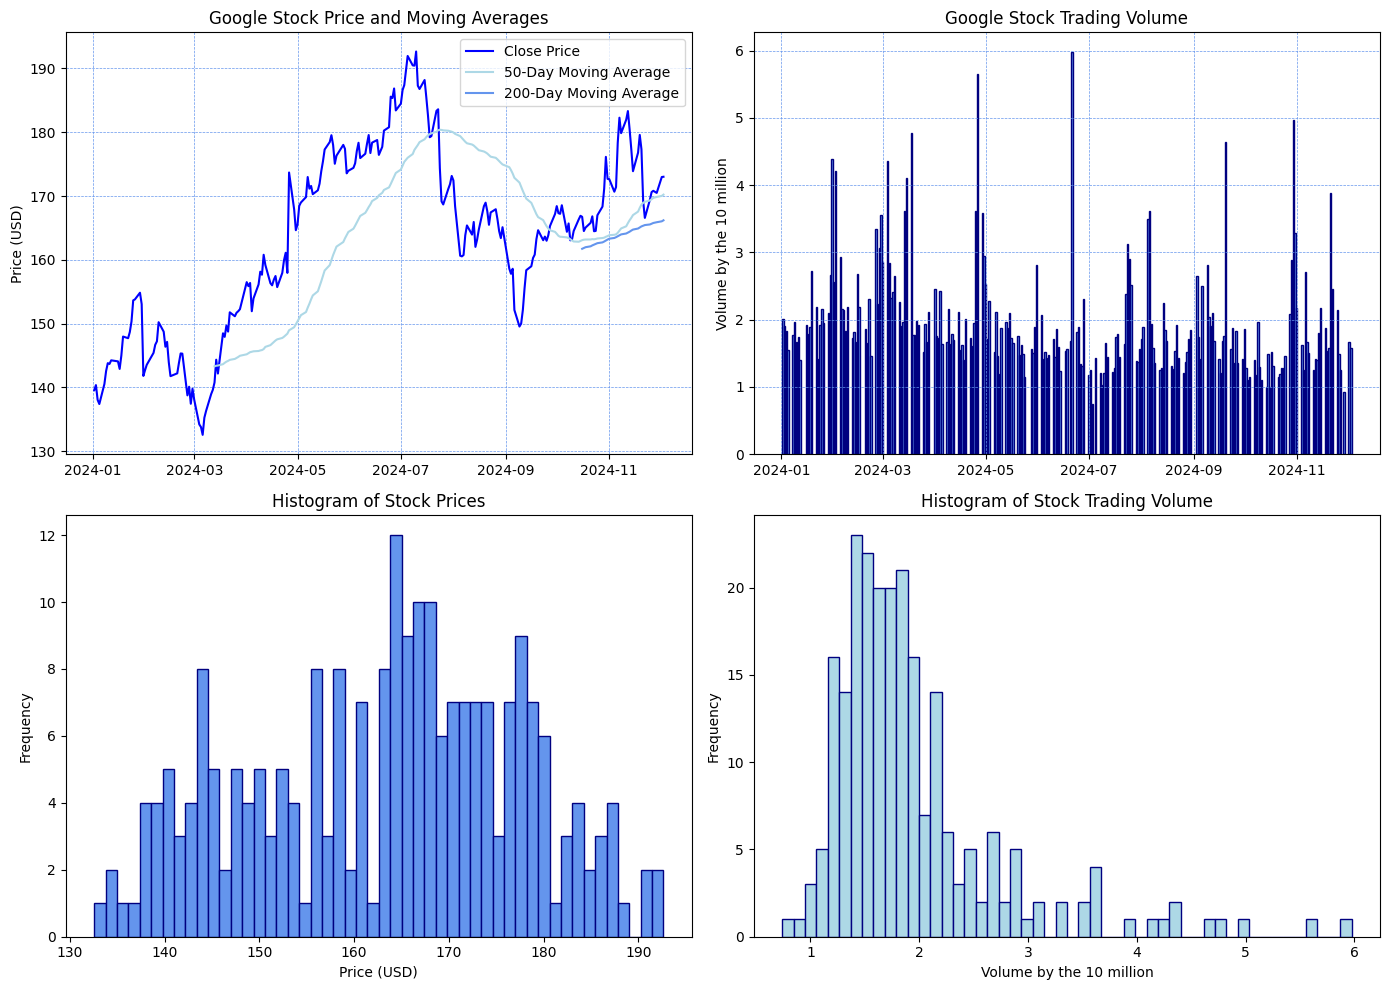

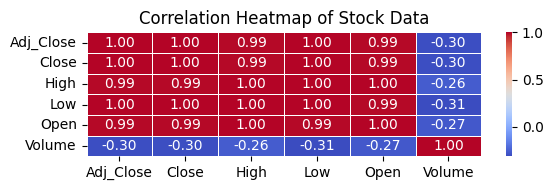

In [ ]:
# Correct file path
file_path = 'GOOG.csv'

# Skip the first two rows and set column names explicitly
column_names = ['Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df = pd.read_csv(file_path, skiprows=2, names=column_names)

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plotting function for Candlestick chart using Plotly
def plot_candlestick():
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'],
                    increasing_line_color='green',
                    decreasing_line_color='red')])
    
    fig.update_layout(title='Google Stock Candlestick Chart',
                      xaxis_title='Date',
                      yaxis_title='Price (USD)',
                      xaxis_rangeslider_visible=False)
    fig.show()

# Updated Main function to generate a dashboard with a grid display
def generate_dashboard():
    # Create the first figure with three plots
    fig1, axs1 = plt.subplots(2, 2, figsize=(12, 8))
    
    # Plot Close Price and Moving Averages
    axs1[0, 0].plot(df.index, df['Close'], label='Close Price', color='blue')
    df['50_day_MA'] = df['Close'].rolling(window=50).mean()
    df['200_day_MA'] = df['Close'].rolling(window=200).mean()
    axs1[0, 0].plot(df.index, df['50_day_MA'], label='50-Day Moving Average', color='lightblue')
    axs1[0, 0].plot(df.index, df['200_day_MA'], label='200-Day Moving Average', color='cornflowerblue')
    axs1[0, 0].set_title('Google Stock Price and Moving Averages', color='black')
    axs1[0, 0].set_ylabel('Price (USD)', color='black')
    axs1[0, 0].legend()
    axs1[0, 0].grid(color='cornflowerblue', linestyle='--', linewidth=0.5)
    
    # Plot Volume Data
    axs1[0, 1].bar(df.index, df['Volume']/10000000, color='cornflowerblue', edgecolor='navy')
    axs1[0, 1].set_title('Google Stock Trading Volume', color='black')
    axs1[0, 1].set_ylabel('Volume by the 10 million', color='black')
    axs1[0, 1].grid(color='cornflowerblue', linestyle='--', linewidth=0.5)
    
    # Histogram of Stock Prices
    axs1[1, 0].hist(df['Close'], bins=50, color='cornflowerblue', edgecolor='navy')
    axs1[1, 0].set_title('Histogram of Stock Prices', color='black')
    axs1[1, 0].set_xlabel('Price (USD)', color='black')
    axs1[1, 0].set_ylabel('Frequency', color='black')
    
    # Histogram of Stock Trading Volume
    axs1[1, 1].hist(df['Volume']/10000000, bins=50, color='lightblue', edgecolor='navy')
    axs1[1, 1].set_title('Histogram of Stock Trading Volume', color='black')
    axs1[1, 1].set_xlabel('Volume by the 10 million', color='black')
    axs1[1, 1].set_ylabel('Frequency', color='black')
    
    # Adjust layout
    fig1.tight_layout()
    plt.show()
    
    # Create the second figure with a heatmap
    fig2, ax2 = plt.subplots(figsize=(7, 3))
    correlation_matrix = df[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax2)
    ax2.set_title('Correlation Heatmap of Stock Data')
    plt.tight_layout()
    plt.show()
    
    # Separate interactive Plotly candlestick chart
    plot_candlestick()

# Run the updated dashboard
generate_dashboard()
